# Decision Tree Model for Regression

## Agenda

* Business Understanding
* Data Understanding
* Data Preparation
* Exploratory Data Analysis
* Building a Decision Tree Model
* Evaluation

### Business Understanding

#### Problem Statement

A large child education toy company which sells edutainment tablets and gaming systems
both online and in retail stores wanted to analyze the customer data. They are operating
from last few years and maintaining all transactional information data. The given data
‘CustomerData.csv’ is a sample of customer level data extracted and processed for the
analysis from various set of transactional files.

The objectives of today’s activity are :
* Building a regression model to predict the customer revenue based on other factors and understand the influence of other attributes on revenue

### Identify right Error Metrics

##### Error Metrics for Regression

* Mean Absolute Error (MAE):

$$MAE = \dfrac{1}{n}\times\sum_{i = 1}^{n}|y_{i} - \hat{y_{i}}|$$


* Mean Squared Error (MSE):

$$MSE = \dfrac{1}{n}\times\sum_{i = 1}^{n}(y_{i} - \hat{y_{i}})^2$$


* Root Mean Squared Error (RMSE):

$$RMSE = \sqrt{\dfrac{1}{n}\times\sum_{i = 1}^{n}(y_{i} - \hat{y_{i}})^2}$$


* Mean Absolute Percentage Error (MAPE):

$$MAPE = \dfrac{100}{n}\times\dfrac{\sum_{i = 1}^{n}\mid y_{i} - \hat{y_{i}}\mid}{y_{i}}$$

#### Loading the required libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

import graphviz

import seaborn as sns

import math

#### Loading the data

In [2]:
data = pd.read_csv("CustomerData.csv", header=0)

In [3]:
type(data)

pandas.core.frame.DataFrame

### Data Understanding

In [4]:
data.shape

(3209, 14)

Display the columns

In [5]:
data.columns

Index(['CustomerID', 'City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=3209, step=1)

See the top rows of the data

In [7]:
data.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


Shows a quick statistic summary of your data using Describe

In [8]:
data.describe(include='all')

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209,3209,3209.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favorite,Uniform,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637,3083,NaN
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,NaN,NaN,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,NaN,NaN,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,NaN,NaN,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,NaN,NaN,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,NaN,NaN,191.250000


Display the data type of each of the variable

In [9]:
data.dtypes 

CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrquncyOfPurchase                 int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object

### Data Preparation

#### Observations:
    1. City is interpreted as numeric (which is actually categorical) and FavouriteGame, FavouriteChannelOfTransaction are interpreted as objects.
    2. max age of children is 113 which must be a wrong entry
    3. Summary statistics for CustomerID is not meaningful

So we now change these appropriately i.e, convert city, favourite game and favourite channel to category, exclude customer id from the data for analysis and treat wrong entry records

##### Check and delete CustomerID attribute

In [10]:
np.size(np.unique(data.CustomerID, return_counts=True)[0])

3209

In [11]:
data.drop('CustomerID', axis=1, inplace=True)

#### Data type conversion 
    Using astype('category') convert 'City', 'FavoriteChannelOfTransaction', 'FavoriteGame' attributes to a categorical data type .

In [12]:
for col in ['City', 'FavoriteChannelOfTransaction', 'FavoriteGame']:
    data[col] = data[col].astype('category')

In [13]:
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

In [14]:
data.describe(include='all')

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
count,3209.0,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209,3209,3209.000000
unique,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favorite,Uniform,NaN
freq,2843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637,3083,NaN
mean,NaN,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,NaN,NaN,168.477183
std,NaN,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,NaN,NaN,81.798528
min,NaN,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,100.000000
25%,NaN,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,NaN,NaN,116.640000
50%,NaN,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,NaN,NaN,142.390000
75%,NaN,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,NaN,NaN,191.250000


Observe how manu records have values 113 for age of children

In [15]:
data.loc[(data['MinAgeOfChild']==113) | (data['MaxAgeOfChild']==113),] #Only colon after comma implies consider all the rows

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
570,1,2,4,113,205,17,17,158,51,8,Favorite,Uniform,218.85
584,1,2,3,113,379,6,6,242,32,0,Favorite,Uniform,100.44
599,1,2,113,113,436,26,26,10502,562,26,Favorite,Uniform,300.00
804,1,3,6,113,286,6,6,2137,72,6,Favorite,Uniform,102.50
878,1,2,5,113,202,9,8,483,68,9,Favorite,Uniform,105.00
897,1,2,5,113,355,16,16,1700,142,10,Favorite,Uniform,270.00
1097,1,3,6,113,432,12,12,2261,194,12,Favorite,Uniform,160.00
1144,1,3,5,113,405,16,14,4438,130,16,Uniform,Uniform,117.50
1413,1,3,4,113,171,15,11,1728,41,15,Favorite,Uniform,107.50
1621,1,2,6,113,187,10,9,731,39,10,Uniform,Uniform,115.00


In [16]:
print (data.shape)

(3209, 13)


#### Removing outliers

In [17]:
#Lets ignore these 20 records for the analysis
data=data.loc[(data['MinAgeOfChild'] !=113) & (data['MaxAgeOfChild']!=113),:] 

In [18]:
#Observe that the number of rows in data1 is less than those in data
print (data.shape)

(3189, 13)


#### Missing Data

pandas primarily uses the value np.nan to represent missing data. 

Check for missing value

    is.null() output boolean i.e. if missing value then true else false. 

    sum function counts 'true' thus gives total number of missing values

In [19]:
data.isnull().sum()

City                            0
NoOfChildren                    0
MinAgeOfChild                   0
MaxAgeOfChild                   0
Tenure                          0
FrquncyOfPurchase               0
NoOfUnitsPurchased              0
FrequencyOFPlay                 0
NoOfGamesPlayed                 0
NoOfGamesBought                 0
FavoriteChannelOfTransaction    0
FavoriteGame                    0
TotalRevenueGenerated           0
dtype: int64

In this case there are no missing values. However if we find any missing values in the data, as a rule of thumb


    If the perticular row/column has more number of missing values then drop that perticular rows/column 
    
        e.g. To drop any rows that have missing data use data.dropna(axis=0, inplace=True) 
        
    Otherwise, impute/fill missing data based on domain knowledge or using imputation techniques
        
        e.g. To fill missing values with mean use data.fillna(data.mean(), inplace=True)      

In [20]:
print (data.columns)

Index(['City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')


In [21]:
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

#### Converting Categorical to Numeric 

For some of the models all the independent attribute should be of type numeric and Linear Regression model is one among them.  
But this data set has some categorial attributes. 

'pandas.get_dummies' To convert convert categorical variable into dummy/indicator variables

Creating dummy variables.
    
    If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category

In [22]:
cols_to_transform = data.select_dtypes(include=['category']).columns
# cols_to_transform = ['FavoriteGame', 'FavoriteChannelOfTransaction', 'City']

In [23]:
data = pd.get_dummies(columns=cols_to_transform, data=data, prefix=cols_to_transform, prefix_sep="_",drop_first=True)

In [24]:
print (data.columns)    

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'TotalRevenueGenerated', 'City_2',
       'FavoriteChannelOfTransaction_Uniform', 'FavoriteGame_Uniform'],
      dtype='object')


In [25]:
data.head(3)

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform
0,2,3,8,210,11,11,2344,108,10,107.51,0,1,1
1,2,3,6,442,20,20,245,22,7,382.40,0,0,1
2,4,3,5,424,18,18,1059,130,18,135.01,0,0,1


####  Split the data into train and test: 

sklearn.model_selection.train_test_split
    
    Split arrays or matrices into random train and test subsets

In [26]:
X, y = data.loc[:,data.columns!='TotalRevenueGenerated'].values, data.loc[:,'TotalRevenueGenerated'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

In [27]:
print (type(X_train))
print (type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Building a Decision Tree Model

In [28]:
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(X_train, y_train)

In [29]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([data.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11
0,NoOfUnitsPurchased,NoOfGamesBought,FavoriteChannelOfTransaction_Uniform,City_2,TotalRevenueGenerated,NoOfGamesPlayed,FrequencyOFPlay,FrquncyOfPurchase,Tenure,MaxAgeOfChild,MinAgeOfChild,NoOfChildren
1,0.898503,0.101497,0,0,0,0,0,0,0,0,0,0


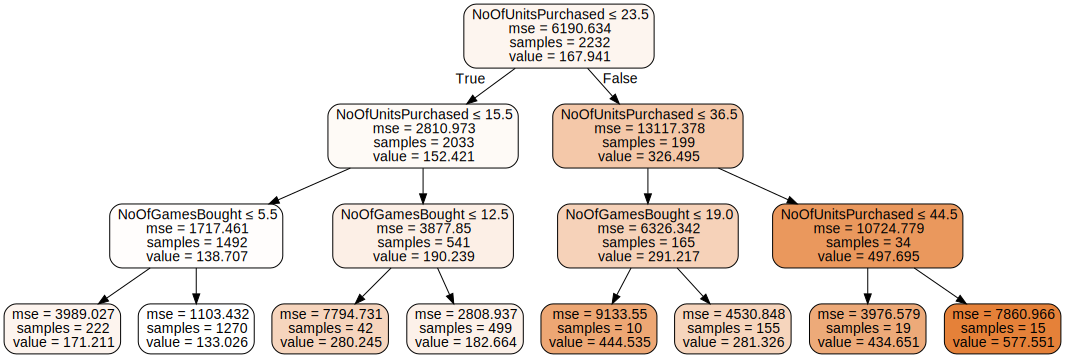

In [30]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=data.drop(columns=['TotalRevenueGenerated']).columns,class_names='TotalRevenueGenerated', filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [31]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [32]:
print(train_pred[:5])
print(test_pred[:5])

[280.2447619  133.02585039 444.535      133.02585039 133.02585039]
[182.66376754 133.02585039 133.02585039 182.66376754 171.21058559]


### Evaluation

In [33]:

print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))


The Mean Absolute Error on train dataset: 33.97482042009769 

The Mean Absolute Error on test dataset: 37.68526836393658 

The Mean Squared Error on train dataset: 2241.5089357377055 

The Mean Squared Error on test dataset: 3036.164636943359 

The Root Mean Squared Error on train dataset: 47.344576624336874 

The Root Mean Squared Error on test dataset: 55.10140322118266 

The Mean Absolute Percentage Error on train dataset: 20.21610083730189 

The Mean Absolute Percentage Error on test dataset: 21.367794159711057 



### Building Decision Tree Model using Variable Importance

In [34]:
select = indices[0:3].tolist()
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(X_train[:,select], y_train)

In [35]:
train_pred = clf.predict(X_train[:,select])
test_pred = clf.predict(X_test[:,select])

In [36]:
print(train_pred[:5])
print(test_pred[:5])

[280.2447619  133.02585039 444.535      133.02585039 133.02585039]
[182.66376754 133.02585039 133.02585039 182.66376754 171.21058559]


### Evaluation

In [37]:
print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))


The Mean Absolute Error on train dataset: 33.97482042009768 

The Mean Absolute Error on test dataset: 37.68526836393657 

The Mean Squared Error on train dataset: 2241.5089357377055 

The Mean Squared Error on test dataset: 3036.164636943359 

The Root Mean Squared Error on train dataset: 47.344576624336874 

The Root Mean Squared Error on test dataset: 55.10140322118266 

The Mean Absolute Percentage Error on train dataset: 20.216100837301887 

The Mean Absolute Percentage Error on test dataset: 21.36779415971105 



### Grid Search for Hyper-parameter tuning

#### Parameters

* max_depth : int or None, optional (default=None)

    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [38]:
# set of parameters to test
param_grid = {'max_depth': range(1,11)}

In [39]:
from sklearn.model_selection import GridSearchCV
dt = tree.DecisionTreeRegressor()
clf = GridSearchCV(dt, param_grid, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 11)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
clf.best_params_

{'max_depth': 4}

In [41]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [42]:

print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))


The Mean Absolute Error on train dataset: 31.514483067683326 

The Mean Absolute Error on test dataset: 36.247333725950526 

The Mean Squared Error on train dataset: 1918.9243955780705 

The Mean Squared Error on test dataset: 2956.4093210816413 

The Root Mean Squared Error on train dataset: 43.80552928088041 

The Root Mean Squared Error on test dataset: 54.37287302581721 

The Mean Absolute Percentage Error on train dataset: 18.759043177979116 

The Mean Absolute Percentage Error on test dataset: 20.541287831588168 

